# Programming Assignment \# 1

# Jonathan Hu; johu5262

__Goal:__ 

This programming assignment will ask you to do the following tasks.

(a) Implement some of the sorting algorithms for sorting integer data in ascending order in python3.
  - Simple sort (implemented for you)
  - Bubble Sort (read from book or online sources)
  - Merge Sort
  - Quicksort 
  
  
(b) Your implementation must count the number of *compare* operations each sorting algorithm carries out.
    
(c) You must formulate a series of arrays of lengths from $5$ to $100$  (step by 5), that will form the worst case of these
sorting algorithms and plot the number of comparisons in the __worst case__ vs. size of input array (x axis)
 
(d) Generate $1000$ random inputs for each size and compute average time. Plot the size of input array (x axis) vs. number of comparisons (y axis)

----
## Simple Sort

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def simple_sort(a):
    # must sort the array a in place and return the number of comparisons
    num_compare = 0
    n = len(a)
    for i in range(0, n): # i goes from 0 to n-1
        for j in range(i+1, n): # j goes from i+1 to n-1
            num_compare = num_compare + 1
            if a[i] >= a[j]:
                # swap
                a[i], a[j] = a[j], a[i]
    return num_compare

In [3]:
# TESTING CODE
a = [3, 10, 1, 29, -1, 4, 3, 15, 2, -2]
nc = simple_sort(a)
print('Num Comparison = ', nc)
print('Sorted Result = ', a)

Num Comparison =  45
Sorted Result =  [-2, -1, 1, 2, 3, 3, 4, 10, 15, 29]


### Complexity analysis of simple sort.

Note that simple sort consists of two loops and regardless of the input array, the first loop runs from n steps. And the second loop runs $n-i-1$ steps where $i$ is the index of the first loop. Thus, the worst case, best case and average case complexity should be $\sum_{j=1}^{n-1} j = \frac{n(n-1)}{2}$ comparisons = $\Theta(n^2)$

The code below plots it for arrays of size 5, 10, ..., 100. However, we cannot really distinguish between the number of comparisons for randomized vs. worst case.

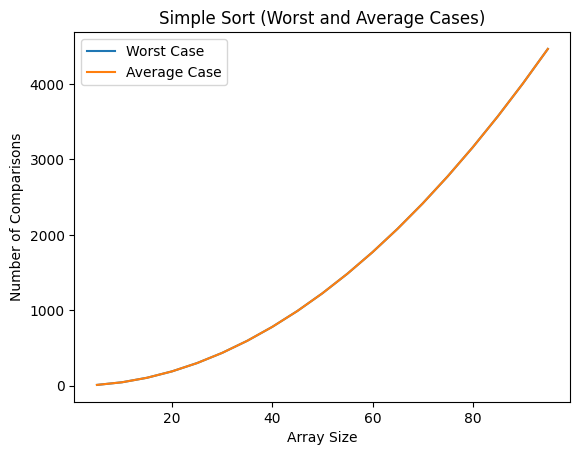

In [4]:
import random

# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

# Code for creating an already sorted array
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    nc = simple_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = simple_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Simple Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----

### Bubble Sort

In [5]:
def bubble_sort(a):
    n = len(a)
    num_compares = 0
    for i in range(n):
        # Initialize swapped flag to False on each iteration
        swapped = False
        # Last i elements are already in place, so the inner loop can end at `n-i-1`
        for j in range(0, n-i-1):
            # Increment comparison counter
            num_compares += 1
            if a[j] > a[j+1]:
                # Swap if the element found is greater than the next element
                a[j], a[j+1] = a[j+1], a[j]
                swapped = True
        # If no two elements were swapped by inner loop, then break
        if not swapped:
            break
    return num_compares

In [6]:
test_array = [5, 3, 8, 4, 2]
num_compares = bubble_sort(test_array)
test_array, num_compares

([2, 3, 4, 5, 8], 10)

### Complexity Analysis of Bubble Sort

### Worst Case: 
The worst-case time complexity of bubble sort occurs when the input array is in reverse order (i.e., sorted in descending order). In this scenario, each element needs to be compared and possibly swapped with every other element in the array. This results in a time complexity of $O(n2)$, where $n$ is the number of elements in the array.

### Average Case: 
The average-case time complexity considers the input array to be in a random order. Under this assumption, bubble sort has a time complexity of $O(n2)$ as well. However, the average case is typically faster than the worst case in practice because not every comparison will lead to a swap, and the algorithm can sometimes finish earlier due to the optimization where it stops if no swaps were made in the previous pass.

### Crafting Worst Case Input:
The worst-case scenario for bubble sort occurs when the array is sorted in reverse order. In such a case, every element needs to be compared and swapped with every other element to which it is compared until it reaches its correct position. This means the maximum number of comparisons and swaps occurs, leading to the most time-consuming sorting process.

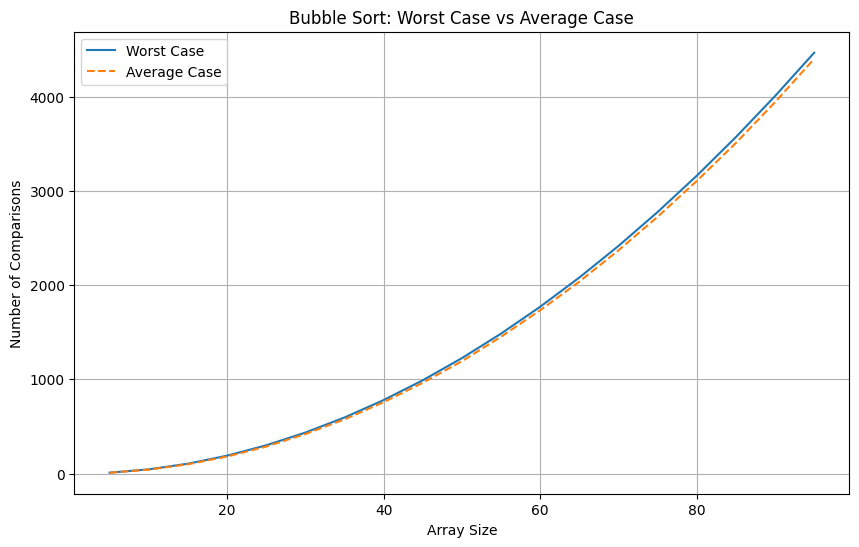

In [7]:
# Define the functions for creating worst and average case scenarios
def create_descending_sorted_array(a_size):
    return list(range(a_size, 0, -1))

def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a

array_sizes = range(5, 100, 5)
num_compares_wc = []
num_compares_avg = []
num_trials = 1000

# Generate data for worst case scenario
for n in array_sizes:
    a = create_descending_sorted_array(n)
    nc = bubble_sort(a)
    num_compares_wc.append(nc)
    
# Generate data for average case scenario
for n in array_sizes:
    total_compares = 0
    for _ in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = bubble_sort(a)
        total_compares += nc
    avg_compares = total_compares / num_trials
    num_compares_avg.append(avg_compares)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_avg, label='Average Case', linestyle='--')
plt.legend()
plt.title('Bubble Sort: Worst Case vs Average Case')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')
plt.grid(True)
plt.show()

----
### Merge Sort

In [9]:
def merge(a, left, middle, right):
    num_compares = 0
    n1 = middle - left + 1
    n2 = right - middle

    # Create temp arrays
    L = [0] * n1
    R = [0] * n2

    # Copy data to temp arrays L[] and R[]
    for i in range(0, n1):
        L[i] = a[left + i]
    for j in range(0, n2):
        R[j] = a[middle + 1 + j]

    # Merge the temp arrays back into a[left..right]
    i = 0  # Initial index of first subarray
    j = 0  # Initial index of second subarray
    k = left  # Initial index of merged subarray
    while i < n1 and j < n2:
        num_compares += 1
        if L[i] <= R[j]:
            a[k] = L[i]
            i += 1
        else:
            a[k] = R[j]
            j += 1
        k += 1

    # Copy the remaining elements of L[], if there are any
    while i < n1:
        a[k] = L[i]
        i += 1
        k += 1

    # Copy the remaining elements of R[], if there are any
    while j < n2:
        a[k] = R[j]
        j += 1
        k += 1

    return num_compares

def merge_sort_recursive(a, left, right):
    num_compares = 0
    if left < right:
        # Same as (left+right)//2, but avoids overflow for large left and right
        middle = left + (right - left) // 2

        # Sort first and second halves
        num_compares += merge_sort_recursive(a, left, middle)
        num_compares += merge_sort_recursive(a, middle + 1, right)
        num_compares += merge(a, left, middle, right)

    return num_compares

def merge_sort(a):
    return merge_sort_recursive(a, 0, len(a) - 1)

In [10]:
test_array = [12, 11, 13, 5, 6, 7]
num_compares = merge_sort(test_array)
test_array, num_compares

([5, 6, 7, 11, 12, 13], 9)

### Complexity Analysis of Merge Sort

### Worst Case: 
The worst-case time complexity of merge sort is $O(nlog⁡n)$, where $n$ is the number of elements in the array. This complexity is due to the algorithm dividing the array into halves recursively and then merging them back together, each level of merge operations requiring linear time across all elements. Unlike many other sorting algorithms, merge sort's worst-case performance is as good as its average-case performance. This is because the process of dividing the array and merging it is consistent regardless of the initial arrangement of elements. Therefore, crafting a specific worst-case input for merge sort is not applicable as its performance does not degrade based on the input's initial order.

### Average Case: 
Similarly, the average-case time complexity is also $O(nlog⁡n)$. The average case assumes a random distribution of input elements. Since the divide-and-merge process of merge sort operates the same way regardless of the input distribution, the average-case complexity remains the same as the worst case.

### Crafting Worst Case Inputs:
It is clear that merge sort's performance does not vary with the input's initial order. Thus, there isn't a specific way to craft an input that results in the worst-case performance for merge sort, as its time complexity is consistently $O(nlogn)$ for all types of inputs.

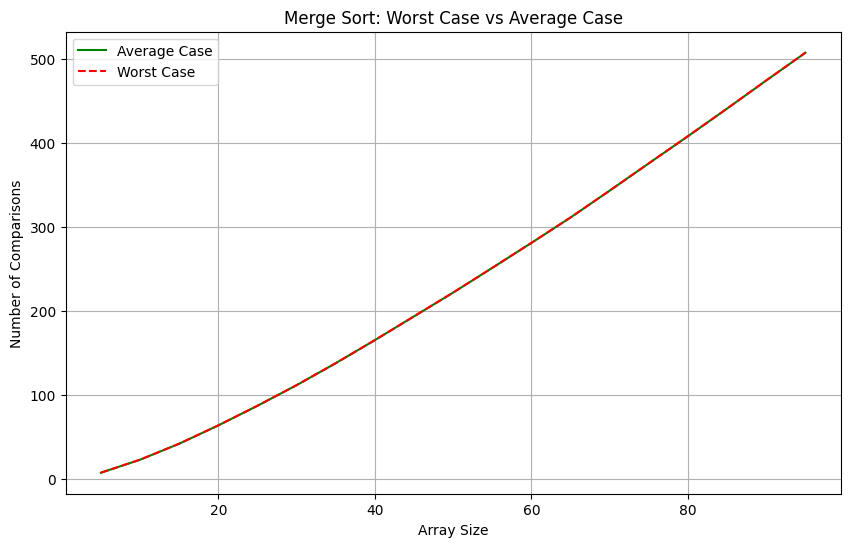

In [23]:
# Generate data for plotting
array_sizes = range(5, 100, 5)
num_compares_avg = []  # Given merge sort's complexity, we will use the same data for both worst and average case

num_trials = 1000

for n in array_sizes:
    total_compares = 0
    for _ in range(num_trials):
        a = create_random_shuffled_array(n)  # Using random arrays for both cases
        nc = merge_sort(a)
        total_compares += nc
    avg_compares = total_compares / num_trials
    num_compares_avg.append(avg_compares)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(array_sizes, num_compares_avg, label='Average Case', color='green')
plt.plot(array_sizes, num_compares_avg, label='Worst Case', linestyle='--', color='red')
plt.legend()
plt.title('Merge Sort: Worst Case vs Average Case')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')
plt.grid(True)
plt.show()

----
### Quick Sort


In [15]:
def partition(a, low, high):
    pivot = a[high]
    i = low - 1  # Index of smaller element
    num_compares = 0

    for j in range(low, high):
        num_compares += 1
        # If current element is smaller than or equal to pivot
        if a[j] <= pivot:
            i += 1
            a[i], a[j] = a[j], a[i]  # Swap

    a[i+1], a[high] = a[high], a[i+1]  # Swap the pivot element with the element at i+1
    return i + 1, num_compares  # Return the partitioning index and number of comparisons

def quick_sort_recursive(a, low, high):
    num_compares = 0
    if low < high:
        pi, nc = partition(a, low, high)  # pi is partitioning index, nc is number of comparisons
        num_compares += nc
        num_compares += quick_sort_recursive(a, low, pi-1)
        num_compares += quick_sort_recursive(a, pi+1, high)
    return num_compares

def quick_sort(a):
    return quick_sort_recursive(a, 0, len(a) - 1)

In [16]:
test_array = [10, 7, 8, 9, 1, 5]
num_compares = quick_sort(test_array)
test_array, num_compares

([1, 5, 7, 8, 9, 10], 11)

### Complexity Analysis of Quick Sort

### Worst Case:
The worst-case time complexity of quick sort occurs when the pivot element is always the smallest or largest element of the array. This unbalanced partitioning leads to $O(n2)$ time complexity, where $n$ is the number of elements in the array. Such a scenario forces quick sort to perform as many partitioning steps as there are elements in the array, effectively degrading to a performance similar to that of bubble sort.

### Average Case:
The average-case time complexity of quick sort is $O(nlog⁡n)$. This assumes that the partitioning of the array is reasonably balanced at each step, which is typically achieved when elements are in a random order or when the pivot selection strategy avoids consistently producing unbalanced partitions.

### Crafting Worst Case Inputs:
To create a worst-case scenario for quick sort, we could ensure that at each step, the pivot selection results in the most unbalanced partitions possible. For example, if the algorithm consistently picks the highest or lowest element as the pivot, an already sorted array (either ascending or descending) can represent a worst-case input.

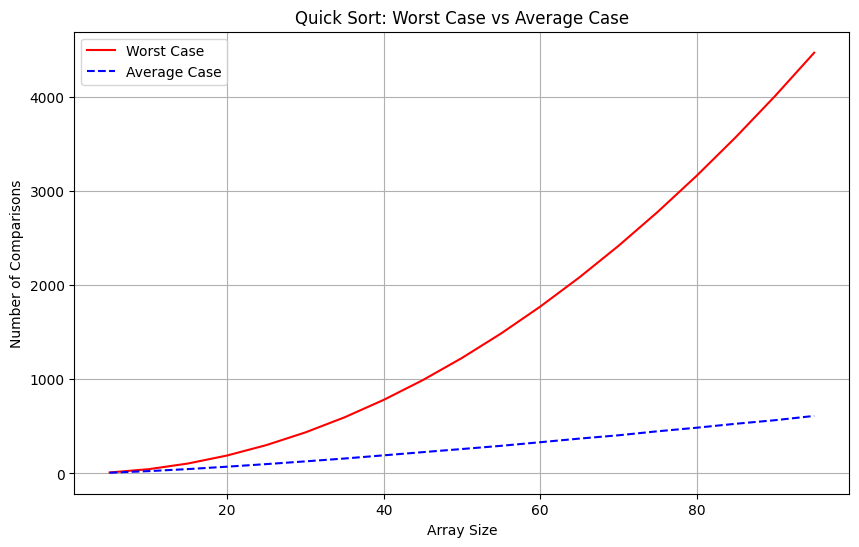

In [24]:
def create_ascending_sorted_array(a_size):
    return list(range(a_size))

def create_descending_sorted_array(a_size):
    return list(range(a_size, 0, -1))

num_compares_wc = []  # Worst case: Descending sorted array for more unbalanced partitions
num_compares_avg = []  # Average case: Randomly shuffled array

# Generating data for the worst case scenario: Descending sorted array
for n in array_sizes:
    a = create_descending_sorted_array(n)  # Using descending sorted array for worst case
    nc = quick_sort(a)
    num_compares_wc.append(nc)

# Generating data for the average case scenario: Randomly shuffled array
for n in array_sizes:
    total_compares = 0
    for _ in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = quick_sort(a)
        total_compares += nc
    avg_compares = total_compares / num_trials
    num_compares_avg.append(avg_compares)

# Plotting the corrected data
plt.figure(figsize=(10, 6))
plt.plot(array_sizes, num_compares_wc, label='Worst Case', color='red')
plt.plot(array_sizes, num_compares_avg, label='Average Case', color='blue', linestyle='--')
plt.legend()
plt.title('Quick Sort: Worst Case vs Average Case')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')
plt.grid(True)
plt.show()

-----
## Testing Code: Do not edit



In [25]:
def test_sorting_algorithm(sort_fun, sz, num_trials):
    num_passed = 0
    for i in range(num_trials):
        a = create_random_shuffled_array(sz)
        a_orig = list(a) # make a copy
        b = sorted(a)
        nc = sort_fun(a)
        if a == b:
            num_passed = num_passed + 1
        else:
            print('----')
            print('FAILED: Input = ', a_orig)
            print('Expected: ', b)
            print('Obtained:', a)
            print('----')
    print('Num Trials = ', num_trials)
    print('Num Passed = ', num_passed)

In [26]:
test_sorting_algorithm(simple_sort, 50, 100)

Num Trials =  100
Num Passed =  100


In [27]:
test_sorting_algorithm(bubble_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [28]:
test_sorting_algorithm(merge_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [29]:
test_sorting_algorithm(quick_sort, 10, 10)

Num Trials =  10
Num Passed =  10
